In [1]:
## start paper trading section:
#import pyfolio as pf
import pandas as pd
import numpy as np
import seaborn as sns

#binance stuff
from binance.client import Client
from customtrading import api_config
import random
## my stuff
import customtrading.CustomData as cd
import customtrading.ML4TFunctions as m4
import customtrading.RNNFunctions as rf


from datetime import datetime, timedelta
#sklearn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns
import backtrader as bt
#import oandapy 
import btoandav20
import oandapyv2
import customtrading.OandaFunctions as of
import oandapy as ondv1
import oandapyv2 as ondv2
from oandapyv2 import APIv20


In [2]:
live_key=api_config.oanda_live_key
live_account=api_config.oanda_live_account

paper_account=api_config.oanda_paper_account
paper_key=api_config.oanda_paper_key

data_key= api_config.oanda_data_key

client          = APIv20(access_token=paper_key,environment='practice')

In [3]:
#start_date      ='05-01-2022T17:00:00'
time_format     ="%Y-%m-%d %H:%M:%S"
cols=['open','high','low','close','volume']
backtest_days=4
train_window=f'{backtest_days}d'
interval='1h'
predict_window='6h'
start_date      =(datetime.utcnow().replace(microsecond=0, second=0) - timedelta(days=backtest_days)).strftime(time_format)
start_date

'2022-08-08 22:16:00'

## Most Stock Exchange or Currency Exchange platforms provide data in the form of prices: (Open, High, Low, Close) and the amount of trades that occured (Volume) for a given Tiem period.
## Quantiative Traders use historical data to try and predict future price movement.
## **goal** Use an LSTM RNN to predict price action across a variety of Tradeable instruments 

In [4]:
data=of.get_oanda_candles(client=client,start=start_date,interval=interval,symbol='USD_PLN',verbose=True)

data

now is 2022-08-12 22:16:05.384018
getting USD_PLN from: 2022-08-08T00:00:00 to: NOW with interval M30 resample to H1


,open,high,low,close,volume,ticker
datetime,,,,,,
2022-08-08 04:30:00+00:00,4.625660,4.628315,4.624730,4.625725,986.5,USD_PLN
2022-08-08 05:30:00+00:00,4.626195,4.628405,4.624600,4.627225,1527.5,USD_PLN
2022-08-08 06:30:00+00:00,4.626830,4.629280,4.622460,4.625905,3743.0,USD_PLN
2022-08-08 07:30:00+00:00,4.618525,4.619375,4.605030,4.608640,5402.5,USD_PLN
2022-08-08 08:30:00+00:00,4.610240,4.617095,4.608795,4.613440,3720.5,USD_PLN
...,...,...,...,...,...,...
2022-08-12 16:30:00+00:00,4.546185,4.547090,4.541410,4.545315,2537.0,USD_PLN
2022-08-12 17:30:00+00:00,4.542250,4.543730,4.538480,4.541415,1466.5,USD_PLN
2022-08-12 18:30:00+00:00,4.538780,4.540315,4.534435,4.536060,1249.5,USD_PLN


In [5]:
symbols=of.get_oanda_instruments2(client,account=paper_account,start='USD',end='USD')
symbols

['USD_PLN',
 'USD_HUF',
 'USD_CAD',
 'USD_DKK',
 'USD_JPY',
 'USD_TRY',
 'USD_CHF',
 'USD_THB',
 'USD_ZAR',
 'USD_CZK',
 'USD_SEK',
 'USD_MXN',
 'USD_HKD',
 'USD_CNH',
 'USD_NOK',
 'USD_SGD',
 'EUR_USD',
 'AUD_USD',
 'GBP_USD',
 'NZD_USD']

Using GPU
training from : 08-11-2022 22:16:00
predicting using : 08-12-2022 21:16:00
window size : 3
start generating ranks 15m
#### Compile Model #####
-----------------------------
Generate USD_PLN rank
now is 2022-08-12 22:16:11.153261
getting USD_PLN from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 6ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 72.61904761904762 %
Predicted value = 4.540925025939941
Previous predicted value = -1.4824036359786987
Change = -406.32176795370407 %


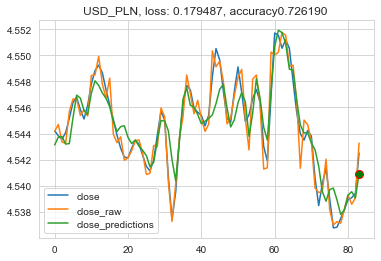

-----------------------------
Generate USD_HUF rank
now is 2022-08-12 22:16:50.552738
getting USD_HUF from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 5ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 64.28571428571429 %
Predicted value = 382.458251953125
Previous predicted value = -1.05936598777771
Change = -36202.56100022888 %


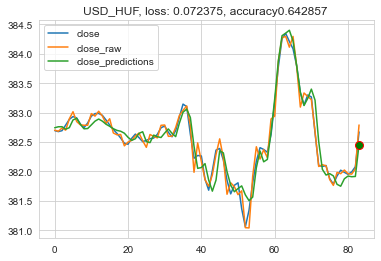

-----------------------------
Generate USD_CAD rank
now is 2022-08-12 22:17:06.408564
getting USD_CAD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 75.0 %
Predicted value = 1.2774522304534912
Previous predicted value = 0.3419865667819977
Change = 273.53871600103355 %


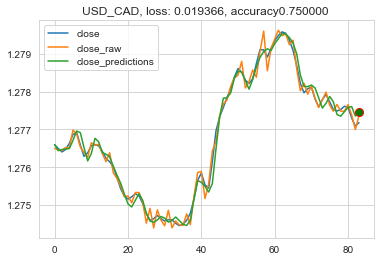

-----------------------------
Generate USD_DKK rank
now is 2022-08-12 22:17:27.020100
getting USD_DKK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 71.42857142857143 %
Predicted value = 7.247979640960693
Previous predicted value = 1.0570409297943115
Change = 585.6858080576945 %


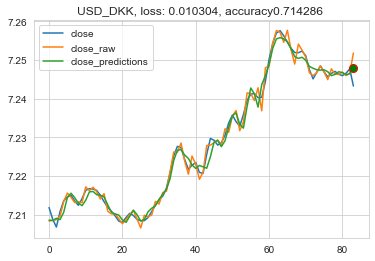

-----------------------------
Generate USD_JPY rank
now is 2022-08-12 22:17:52.955329
getting USD_JPY from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 72.61904761904762 %
Predicted value = 133.505859375
Previous predicted value = 0.3224559724330902
Change = 41302.81799330063 %


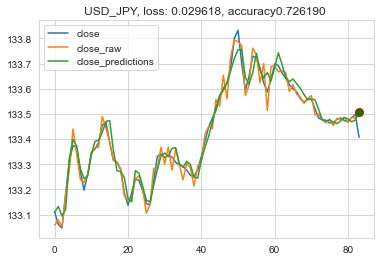

-----------------------------
Generate USD_TRY rank
now is 2022-08-12 22:18:18.200422
getting USD_TRY from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 73.80952380952381 %
Predicted value = 17.925453186035156
Previous predicted value = -2.061319589614868
Change = -969.6105774352197 %


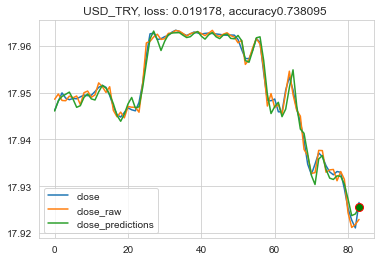

-----------------------------
Generate USD_CHF rank
now is 2022-08-12 22:18:37.521542
getting USD_CHF from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 85.71428571428571 %
Predicted value = 0.9416172504425049
Previous predicted value = -0.4797901213169098
Change = -296.2560729383068 %


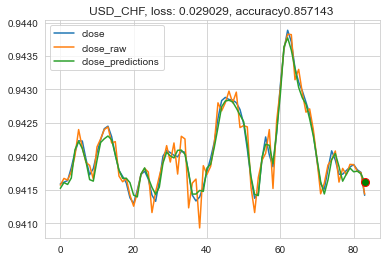

-----------------------------
Generate USD_THB rank
now is 2022-08-12 22:18:58.745199
getting USD_THB from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 4ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 89.28571428571429 %
Predicted value = 35.306907653808594
Previous predicted value = -0.2133265733718872
Change = -16650.637408054594 %


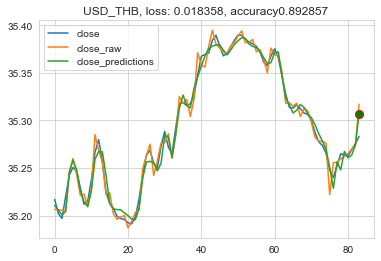

-----------------------------
Generate USD_ZAR rank
now is 2022-08-12 22:19:20.337962
getting USD_ZAR from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 5ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 83.33333333333334 %
Predicted value = 16.187448501586914
Previous predicted value = -1.9851340055465698
Change = -915.433540323138 %


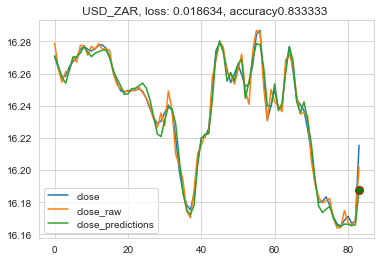

-----------------------------
Generate USD_CZK rank
now is 2022-08-12 22:19:41.630181
getting USD_CZK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 67.85714285714286 %
Predicted value = 23.751070022583008
Previous predicted value = 0.8613343834877014
Change = 2657.473807838781 %


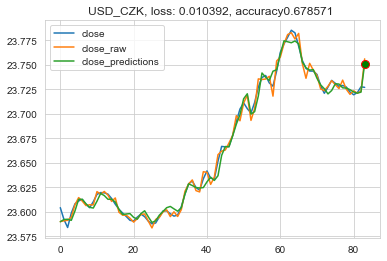

-----------------------------
Generate USD_SEK rank
now is 2022-08-12 22:19:59.089851
getting USD_SEK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 76.19047619047619 %
Predicted value = 10.204666137695312
Previous predicted value = 1.2879607677459717
Change = 692.3118772906605 %


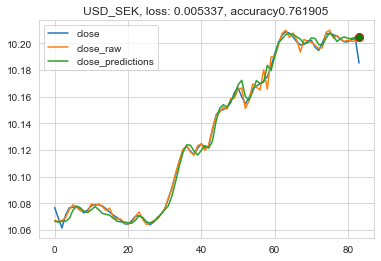

-----------------------------
Generate USD_MXN rank
now is 2022-08-12 22:20:16.117924
getting USD_MXN from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 5ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 77.38095238095238 %
Predicted value = 19.836267471313477
Previous predicted value = -1.8165273666381836
Change = -1191.9883639311265 %


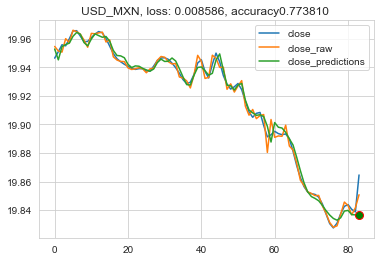

-----------------------------
Generate USD_HKD rank
now is 2022-08-12 22:20:40.228023
getting USD_HKD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 7ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 78.57142857142857 %
Predicted value = 7.836676120758057
Previous predicted value = 0.48258107900619507
Change = 1523.9086988028087 %


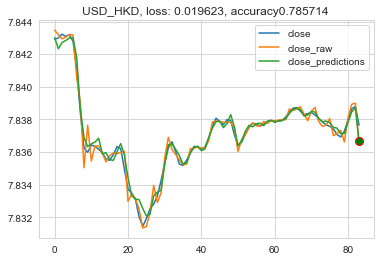

-----------------------------
Generate USD_CNH rank
now is 2022-08-12 22:20:58.795256
getting USD_CNH from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 5ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 84.52380952380952 %
Predicted value = 6.736813545227051
Previous predicted value = -0.4746980369091034
Change = -1519.1787244565826 %


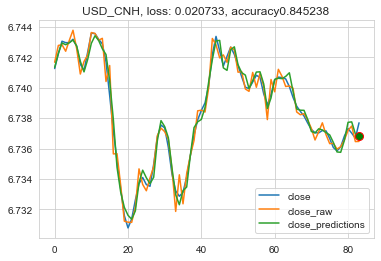

-----------------------------
Generate USD_NOK rank
now is 2022-08-12 22:21:22.578526
getting USD_NOK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 4ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 75.0 %
Predicted value = 9.575855255126953
Previous predicted value = 1.0204163789749146
Change = 838.4262593615583 %


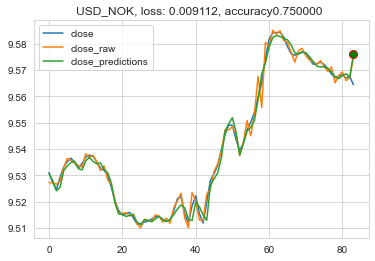

-----------------------------
Generate USD_SGD rank
now is 2022-08-12 22:21:46.337865
getting USD_SGD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 6ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 80.95238095238095 %
Predicted value = 1.3713809251785278
Previous predicted value = 0.5472964644432068
Change = 150.5736861599691 %


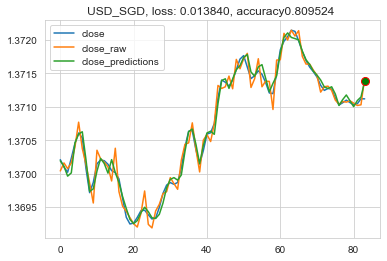

-----------------------------
Generate EUR_USD rank
now is 2022-08-12 22:22:10.471595
getting EUR_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 3ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 82.14285714285714 %
Predicted value = 1.0256927013397217
Previous predicted value = -1.1129261255264282
Change = -192.16179563172318 %


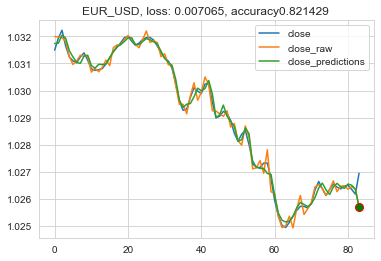

-----------------------------
Generate AUD_USD rank
now is 2022-08-12 22:22:35.914788
getting AUD_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 5ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 72.61904761904762 %
Predicted value = 0.7123701572418213
Previous predicted value = 1.340279459953308
Change = -46.849132697546644 %


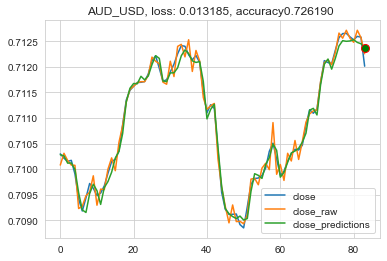

-----------------------------
Generate GBP_USD rank
now is 2022-08-12 22:22:57.996810
getting GBP_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 6ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 82.14285714285714 %
Predicted value = 1.2133734226226807
Previous predicted value = -0.7995842695236206
Change = -251.75053698162282 %


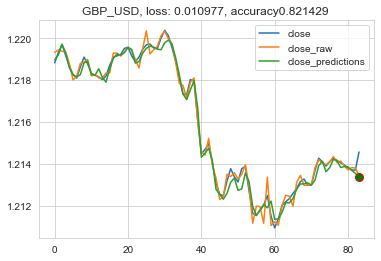

-----------------------------
Generate NZD_USD rank
now is 2022-08-12 22:23:22.149423
getting NZD_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'volume', 'pct_change', 'close'], dtype='object')
Window size: 3
TRAINing data points:90
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 86
3/3 [==============================] - 0s 4ms/step
LENGTH OF PREDICTION= 1
Predictors accuracy = 84.52380952380952 %
Predicted value = 0.6455343961715698
Previous predicted value = 1.4042342901229858
Change = -54.02943791416512 %


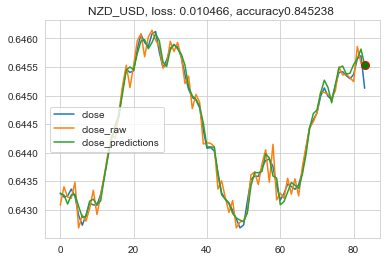

done with model fit/predict. loss= 0.010465960949659348 clear memory


In [6]:
# **Part 1:** Predict Closing Prices
time_format     ="%Y-%m-%d %H:%M:%S"
cols=['open','high','low','close','volume']
backtest_days=1
train_window=f'{backtest_days}d'
predict_window='1h'
interval='15m'

ranks=rf.generate_FX_ranks(client=client, train_window=train_window, symbols=symbols,predict_window=predict_window, interval=interval,target='close',today='',plot_results=True,smoother=True,verbose=False)

Using GPU
training from : 08-11-2022 22:23:00
predicting using : 08-12-2022 21:23:00
window size : 3
start generating ranks 15m
#### Compile Model #####
-----------------------------
Generate USD_PLN rank
now is 2022-08-12 22:23:47.590554
getting USD_PLN from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 7ms/step
Predictors accuracy = 77.10843373493977 %
Predicted %change = -0.02088857436319813 %


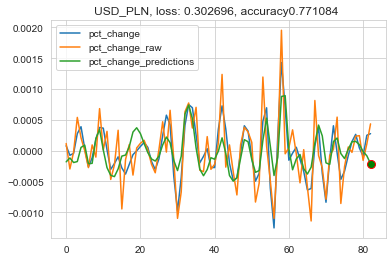

-----------------------------
Generate USD_HUF rank
now is 2022-08-12 22:24:18.500267
getting USD_HUF from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 6ms/step
Predictors accuracy = 67.46987951807229 %
Predicted %change = -0.01774606353137642 %


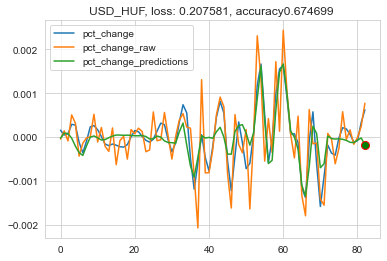

-----------------------------
Generate USD_CAD rank
now is 2022-08-12 22:24:43.513926
getting USD_CAD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 62.65060240963856 %
Predicted %change = -0.001674517261562869 %


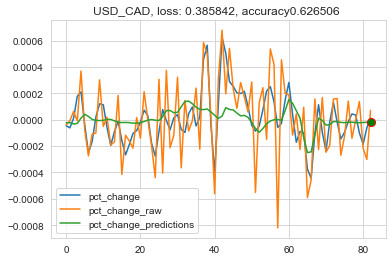

-----------------------------
Generate USD_DKK rank
now is 2022-08-12 22:25:08.225391
getting USD_DKK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 83.13253012048193 %
Predicted %change = -0.05731493001803756 %


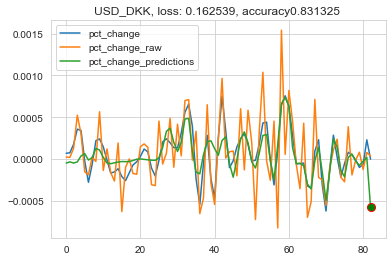

-----------------------------
Generate USD_JPY rank
now is 2022-08-12 22:25:36.706624
getting USD_JPY from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 73.49397590361446 %
Predicted %change = -0.004971291127731092 %


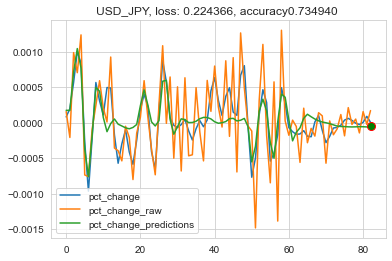

-----------------------------
Generate USD_TRY rank
now is 2022-08-12 22:26:02.353128
getting USD_TRY from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 3ms/step
Predictors accuracy = 77.10843373493977 %
Predicted %change = -0.01573031477164477 %


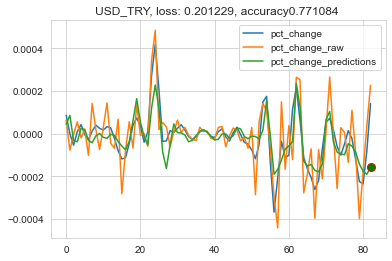

-----------------------------
Generate USD_CHF rank
now is 2022-08-12 22:26:25.451005
getting USD_CHF from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 6ms/step
Predictors accuracy = 89.1566265060241 %
Predicted %change = -0.009219138883054256 %


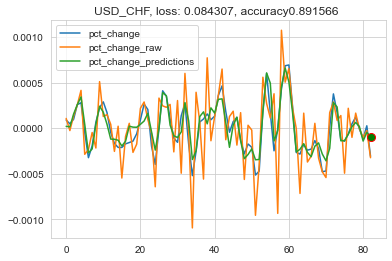

-----------------------------
Generate USD_THB rank
now is 2022-08-12 22:26:47.989388
getting USD_THB from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 4ms/step
Predictors accuracy = 85.54216867469879 %
Predicted %change = 0.09152624406851828 %


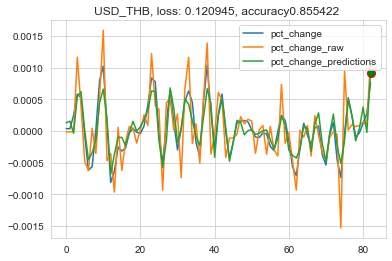

-----------------------------
Generate USD_ZAR rank
now is 2022-08-12 22:27:10.818303
getting USD_ZAR from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 3ms/step
Predictors accuracy = 90.36144578313254 %
Predicted %change = 0.003614663000917062 %


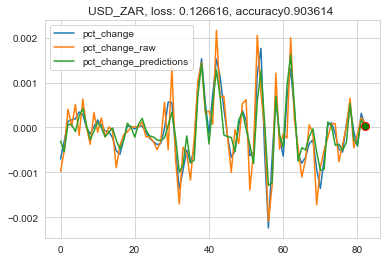

-----------------------------
Generate USD_CZK rank
now is 2022-08-12 22:27:28.157349
getting USD_CZK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 87.95180722891565 %
Predicted %change = -0.037049371167086065 %


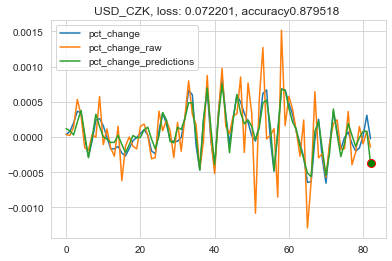

-----------------------------
Generate USD_SEK rank
now is 2022-08-12 22:27:49.678352
getting USD_SEK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 4ms/step
Predictors accuracy = 80.72289156626506 %
Predicted %change = -0.003116675725323148 %


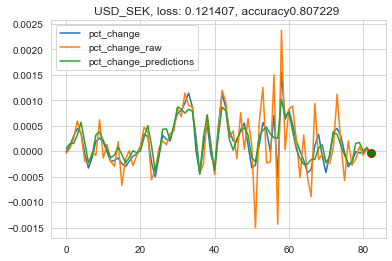

-----------------------------
Generate USD_MXN rank
now is 2022-08-12 22:28:11.188207
getting USD_MXN from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 3ms/step
Predictors accuracy = 87.95180722891565 %
Predicted %change = 0.013567626592703164 %


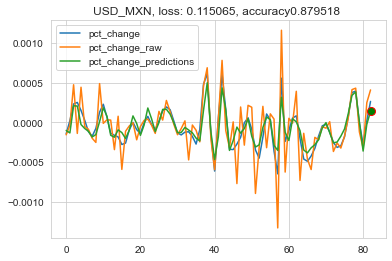

-----------------------------
Generate USD_HKD rank
now is 2022-08-12 22:28:33.829191
getting USD_HKD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 6ms/step
Predictors accuracy = 83.13253012048193 %
Predicted %change = 0.002868779847631231 %


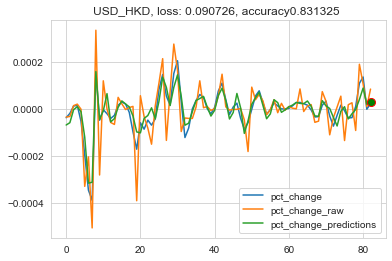

-----------------------------
Generate USD_CNH rank
now is 2022-08-12 22:28:56.369634
getting USD_CNH from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 4ms/step
Predictors accuracy = 89.1566265060241 %
Predicted %change = -0.002086530366796069 %


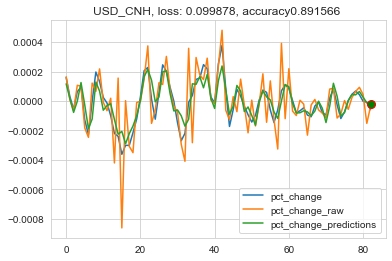

-----------------------------
Generate USD_NOK rank
now is 2022-08-12 22:29:11.468004
getting USD_NOK from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 4ms/step
Predictors accuracy = 79.51807228915662 %
Predicted %change = 0.0040819515561452135 %


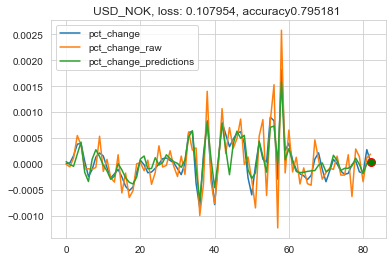

-----------------------------
Generate USD_SGD rank
now is 2022-08-12 22:29:34.515010
getting USD_SGD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 86.74698795180723 %
Predicted %change = 0.003196207035216503 %


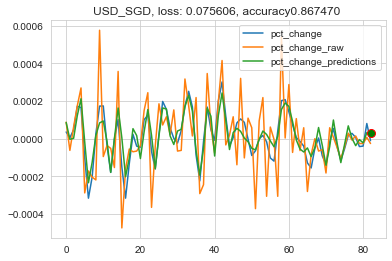

-----------------------------
Generate EUR_USD rank
now is 2022-08-12 22:29:53.812265
getting EUR_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 3ms/step
Predictors accuracy = 89.1566265060241 %
Predicted %change = 0.007088541315170005 %


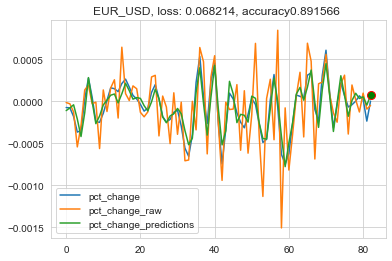

-----------------------------
Generate AUD_USD rank
now is 2022-08-12 22:30:14.784449
getting AUD_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 86.74698795180723 %
Predicted %change = 0.003839271448669024 %


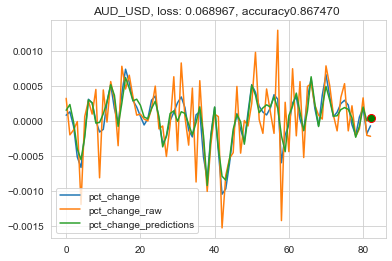

-----------------------------
Generate GBP_USD rank
now is 2022-08-12 22:30:38.789311
getting GBP_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 5ms/step
Predictors accuracy = 84.33734939759037 %
Predicted %change = 0.0020571716959238984 %


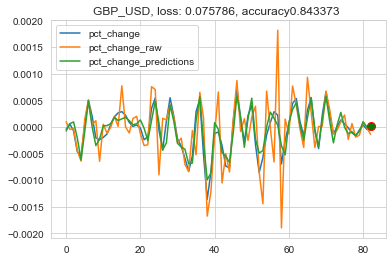

-----------------------------
Generate NZD_USD rank
now is 2022-08-12 22:31:01.372076
getting NZD_USD from: 2022-08-10T00:00:00 to: NOW with interval M10 resample to M15
##### Convert to tensors #######
features= Index(['open', 'high', 'low', 'close', 'volume', 'pct_change'], dtype='object')
Window size: 3
TRAINing data points:89
TEST data points:0
---------------------
not enough data to create a full test window
Make Test bigger
window size: 3
UPDATED: TEST data points: 4
UPDATED: Training data points: 85
3/3 [==============================] - 0s 3ms/step
Predictors accuracy = 97.59036144578313 %
Predicted %change = 0.019076713942922652 %


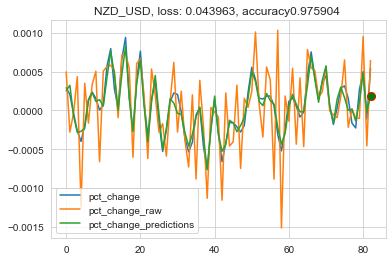

done with model fit/predict. loss= 0.0439632385969162 clear memory


In [7]:
# **Part 2:** Predict Closing Price Percent Change
time_format     ="%Y-%m-%d %H:%M:%S"
cols=['open','high','low','close','volume']
backtest_days=1
train_window=f'{backtest_days}d'
predict_window='1h'
interval='15m'

ranks=rf.generate_FX_ranks(client=client, train_window=train_window, symbols=symbols,predict_window=predict_window, interval=interval,target='pct_change',today='',plot_results=True,smoother=True,verbose=False)